### TPC7: Construir uma aplicação para manipular polinómios

Depois da aula da semana passada, já tens algumas funções desenvolvidas que te irão ajudar a construir a aplicação que se descreve a seguir.

* Aquecimento: Instancia os seguintes exemplos num ficheiro de texto com o formato definido na última aula
    - `x^7 - 3.7x^4 + 5x^3 - 88`
    - `2x^2 + 17`
    - `7x^4 + 6x^3 - x^2 + 43`
    - `x^4`
    - `x^2`
    - `x^3`

* Desenvolve as seguintes funcionalidades que não foram trabalhadas na aula:
    1. Define uma função que dado um polinómio calcula a sua derivada;
    2. Define uma função que recebe dois polinómios `p1` e `p2` e calcula um novo polinómio correspondente à soma de `p1` e `p2`;
    3. Define uma função que recebe um polinómio e o desenha num gráfico.

* Num ficheiro Python, cria uma aplicação para manipular polinómios com as seguintes operações:
    1. Criar um polinómio interativamente;
    2. Ler uma lista de polinómios de um ficheiro;
    3. Listar polinómios: mostra numa tabela os polinómios carregados em memória, adicionando um número de ordem a cada um;
    4. Calcular o valor de um polinómio num ponto (usa o número de ordem para referenciar o polinómio);
    5. Listar polinómios com grau: à listagem anterior, acrescenta mais uma coluna com o grau;
    6. Maior grau: mostra o polinómio de maior grau e indica o seu número de ordem;
    7. Derivada: mostra uma tabela com os polinómios e as respetivas derivadas;
    8. Somar dois polinómios: indicando os seus números de ordem;
    9. Gerar um gráfico para o polinómio;
    10. Gravar num ficheiro os polinómios em memória;
    0. Sair da aplicação

In [2]:
#AQUECIMENTO

# [(coef, grau)]
# polinomio = [(coef,grau),(coef,grau), ...]

p1 = [(1,7) , (-3.7 , 4) , (5,3) , (-88, 0)]
p2 = [(2,2) , (17,0)]
p3 = [(7,4), (6,3), (-1,2) , (43,0) ]
p4 = [(1,4)]
p5 = [(1,3)]
p6 = [(1,2)]

In [4]:
def polinomiosFicheiro (polinomiosLista, ficheiro):
    f = open (ficheiro, "w")
    for polinomio in polinomiosLista :
        for termo in polinomio :
            coef , grau = termo
            f.write (str (coef) + ";" + str (grau))
        f.write ("\n")
    f.close ()

polinomiosLista1 = [p1, p2, p3, p4, p5, p6]
polinomiosFicheiro (polinomiosLista1, "polinomiosT.txt")

In [11]:
#Derivada de um polinomio

def derivadaPol (polinomio) :
    derivada = []
    for coef, grau in polinomio :
        coef = coef * grau
        grau = grau - 1
        derivada.append ((coef, grau))
        if coef == 0 :
            derivada.remove ((coef,grau))
    return derivada

derivadaPol (p1)

[(7, 6), (-14.8, 3), (15, 2)]

In [14]:
#Soma de 2 polinomios

def somaPol (polinomio1 , polinomio2) :
    soma = []
    i = 0
    j = 0
    while i < len (polinomio1) :
        coef1,grau1 = polinomio1[i]
        coef2,grau2 = polinomio2[j]
        if grau1 == grau2 :
            coefFinal = coef1 + coef2
            soma.append ((coefFinal , grau1))
        elif grau1 != grau2 :
            soma.append ((coef1, grau1))
        i = i + 1
    while j < len (polinomio2) :
        for coef2,grau2 in polinomio2 :
            if grau2 not in soma :
                soma.append ((coef2 , grau2))
            j = j + 1
    return soma

    
somaPol (p1,p2)

[(1, 7), (-3.7, 4), (5, 3), (-88, 0), (2, 2), (17, 0)]

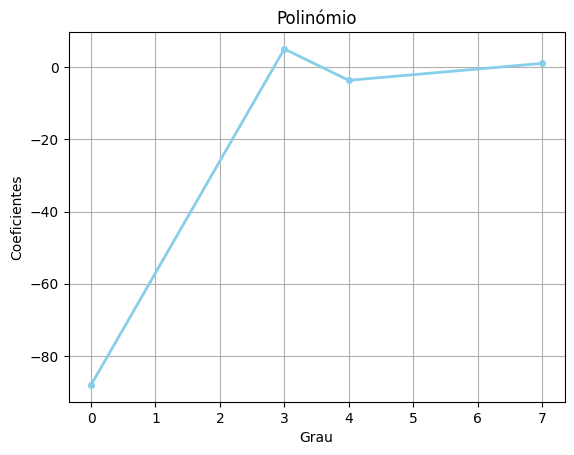

In [57]:
#Desenha um gráfico

import matplotlib.pyplot as plt
def desenhaGráfico (polinomio) :
    i = 0
    x = []
    y = []
    while i < len (polinomio) :
        xValores = polinomio[i][1]
        yValores = polinomio[i][0]
        x.append (xValores)
        y.append (yValores)
        i = i + 1
    plt.plot (x, y, color='skyblue', linewidth=2, marker='o', markerfacecolor='skyblue', markersize=4)
    plt.xlabel ('Grau')
    plt.ylabel ('Coeficientes')
    plt.title ('Polinómio')
    plt.grid (True)
    plt.show ()
    return

desenhaGráfico (p1)


In [153]:
def criaPol () :
    grau = int (input ("Escreva o maior grau do seu polinómio: "))
    Pol = []
    while grau >= 0 :
        coef = int (input ("Introduza o coeficiente: "))
        if coef != 0 :
            termo = (coef, grau)
            Pol.append (termo)
        grau = grau - 1
    print (Pol)



In [154]:
#LER FICHEIRO DE POLINOMIOS
def lerFicheiro (ficheiro) :
    f = open (ficheiro , "r")
    i = []
    for linha in f:
        linha = linha.strip()
        termo = linha.split (" ")
        i.append (termo)
    f.close ()
    return i

memoria = lerFicheiro ("polinomiosT.txt")


#def lerFicheiro2 (ficheiro) :
#    f = open (ficheiro)
#   pol = [eval(i) for i in f]
#   f.close()
#   return pol
#memoria = lerFicheiro2 ("polinomiosT.txt")

In [155]:
#LISTAR POLINOMIOS NUMA TABELA COM O NÚMERO DE ORDEM DE CADA UM
def listarPol (memoria) :
    elem = 0
    print ("Ordem |   Termos                    ")
    print ("------------------------------------")
    while elem < len (memoria) :
        print (f"\n {elem + 1} | {memoria[elem]}") 
        elem = elem + 1

listarPol (memoria)

Ordem |   Termos                    
------------------------------------

 1 | ['1;7-3.7;45;3-88;0']

 2 | ['2;217;0']

 3 | ['7;46;3-1;243;0']

 4 | ['1;4']

 5 | ['1;3']

 6 | ['1;2']


In [128]:
def pot (a, b) :
    res = 1
    while b > 0 :
        res = res * a
        b = b - 1
    return res
def calcPolinomio(memoria, x):
    res = 0
    i = int (input ("Introduza o número da ordem do polinómio"))
    o = i - 1
    p = memoria[o]
    for termo in p :
        coef, grau = termo
        res = res + coef * pot (x , grau)
    return res

calcPolinomio (memoria, 3)


ValueError: too many values to unpack (expected 2)

In [145]:
def calcGrau(polinomio):
    maxGrau = 0
    for coef, grau in polinomio:
        if maxGrau == 0 or grau > maxGrau or (grau == maxGrau) : 
            maxGrau = grau
    return maxGrau
calcGrau (p1)

7

In [150]:

def listarPolEGrau (memoria) :
    elem = 0
    print ("Ordem |   Termos                    | Grau   ")
    print ("---------------------------------------------")
    while elem < len (memoria) :
        print (f"\n {elem + 1} | {memoria[elem]} | {calcGrau (memoria[elem])}") 
        elem = elem + 1

listarPolEGrau ("polinomiosT.txt")



Ordem |   Termos                    | Grau   
---------------------------------------------


ValueError: not enough values to unpack (expected 2, got 1)

In [151]:
def maior(lista):
    maior = 0
    for n in lista :
        if n > maior :
            maior = n
    return maior
def maxGrauPol (memoria):
    listaGraus = []
    for polinomios in memoria :
        listaGraus.append (calcGrau(polinomios))
    i = maior(listaGraus)
    for j in range (len(memoria)) :
        for k in range (memoria[j]):
            if memoria[j][k][1] == i :
                polMaior = memoria[j]
                ordem = j + 1
    print (f"\n Polinómio de maior grau :: {ordem} | {polMaior} | Grau :: {i}" )
    
maxGrauPol (memoria)
    

TypeError: 'NoneType' object is not iterable

In [159]:
def derivada2 (memoria) :
    listaDerivadas = []
    for polinomios in memoria :
        listaDerivadas.append (derivadaPol(polinomios))
    for j in range (len(memoria)) :
        ordem = j + 1
    
    print (f"\n Polinómio :: {ordem} |  Derivada :: {listaDerivadas}" )
derivada2 (memoria)

TypeError: 'NoneType' object is not iterable

In [ ]:
def soma (memoria) :
    listaSoma = []
    a = int (input ("Introduza o número de ordem do 1º polinómio: "))
    b = int (input ("Introduza o número de ordem do 2º polinómio: "))
    for polinomios in memoria :
        listaSoma.append ((somaPol (a,b)))
    for i in range (len(memoria)) :
        ordem = i + 1
    print (f"\n Polinómio :: {ordem} |  Soma :: {listaSoma}" )

In [142]:
def guardarPolinomios(memoria, fnome):
    file = open (fnome, "w")
    for p in memoria :
        for termo in p :
            coe , grau = termo
            file.write (str (coe) +";" + str (grau))

guardarPolinomios (memoria, "polinomiosT2.txt")

ValueError: too many values to unpack (expected 2)

In [157]:

print ("1. Criar um polinómio interativamente")
print ("2. Ler uma lista de polinómios de um ficheiro")
print ("3. Listar polinómios: mostra numa tabela os polinómios carregados em memória, adicionando um número de ordem a cada um")
print ("4. Calcular o valor de um polinómio num ponto (usa o número de ordem para referenciar o polinómio)")
print ("5. Listar polinómios com grau: à listagem anterior, acrescenta mais uma coluna com o grau")
print ("6. Maior grau: mostra o polinómio de maior grau e indica o seu número de ordem")
print ("7. Derivada: mostra uma tabela com os polinómios e as respetivas derivadas")
print ("8. Somar dois polinómios: indicando os seus números de ordem;")
print ("9. Gerar um gráfico para o polinómio")
print ("10. Gravar num ficheiro os polinómios em memória")
print ("0. Sair da aplicação")
escolha = int (input ("Escolha o menu que pretende aplicar sobre o(s) polinómio(s) : "))

while escolha != 0 :
    if escolha == 1 :
       criaPol () 
        
    if escolha == 2 :
        b = input ("Insira o nome do seu ficheiro: ")
        print (lerFicheiro (b))
        memoria = lerFicheiro (b)
        
    if escolha == 3 :
        listarPol (memoria)
        memoria = listarPol (memoria)

    if escolha == 4 :
        x = int (input ("Introduza o valor que quer que x tome: "))
        calcPolinomio (memoria, x)
        memoria = calcPolinomio (memoria, x)

    if escolha == 5 :
        listarPolEGrau (memoria)
        memoria = listarPolEGrau (memoria)

    if escolha == 6 :
        maxGrauPol (memoria)
        memoria = maxGrauPol (memoria)
    
    if escolha == 7 :
        derivada2 (memoria)
        memoria = derivada2 (memoria)

    if escolha == 8 :
        soma (memoria)
        memoria = soma (memoria)
    
    if escolha == 9 :
        
                
    escolha = int (input ("Escolha o menu que pretende aplicar sobre o(s) polinómio(s) : "))

    

1. Criar um polinómio interativamente
2. Ler uma lista de polinómios de um ficheiro
3. Listar polinómios: mostra numa tabela os polinómios carregados em memória, adicionando um número de ordem a cada um
4. Calcular o valor de um polinómio num ponto (usa o número de ordem para referenciar o polinómio)
5. Listar polinómios com grau: à listagem anterior, acrescenta mais uma coluna com o grau
6. Maior grau: mostra o polinómio de maior grau e indica o seu número de ordem
7. Derivada: mostra uma tabela com os polinómios e as respetivas derivadas
8. Somar dois polinómios: indicando os seus números de ordem;
9. Gerar um gráfico para o polinómio
10. Gravar num ficheiro os polinómios em memória
0. Sair da aplicação
Ordem |   Termos                    
------------------------------------

 1 | ['1;7-3.7;45;3-88;0']

 2 | ['2;217;0']

 3 | ['7;46;3-1;243;0']

 4 | ['1;4']

 5 | ['1;3']

 6 | ['1;2']
Ordem |   Termos                    
------------------------------------

 1 | ['1;7-3.7;45;3-88;

ValueError: invalid literal for int() with base 10: ''